Daniel Shalom && Nadav Kugman

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:98: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.


sort with hog ???  [y/n]  :y


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:184: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:187: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.


Total img  54
    
sort with PCA  ???  [y/n]  :y


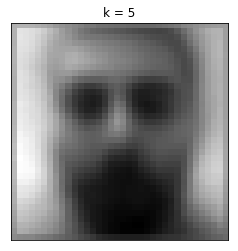

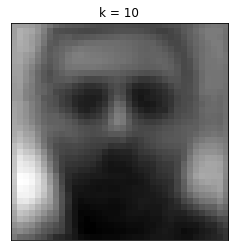

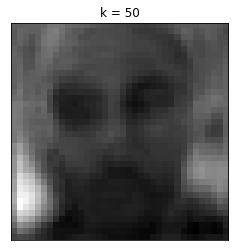

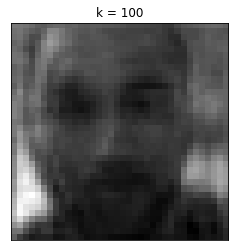

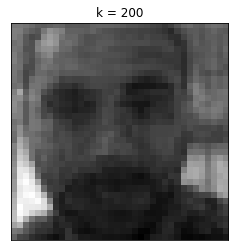

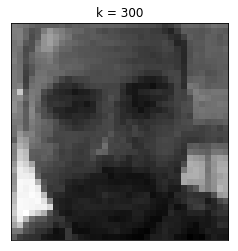

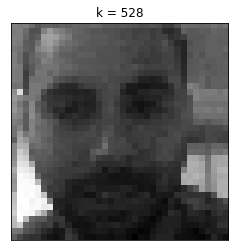

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import re
from glob import glob
import random

winSize = (36, 36)
blockSize = (6, 6)
blockStride = (3, 3)
cellSize = (3, 3)
nbins = 9
hog = cv2.HOGDescriptor( winSize, blockSize, blockStride, cellSize, nbins )
fnames = glob( 'faces1\*.JPG' )

faces_images = []
faces_descriptors = []
lbl = np.ones_like( fnames )

color = np.random.randint(0,255,(20,3))
j= 0
t=0
for i, f in enumerate( fnames ):
	name, ext = f.split( '.' )
	name = re.sub( r'[\d_-]', '', name )
	name = name.split( '\\' )[-1]
	im = cv2.imread( f, 0 )
	im = cv2.resize( im, (winSize) )

	faces_images.append( im )
	faces_descriptors.append( hog.compute( faces_images[i] ) )
random.shuffle( faces_descriptors )
faces_descriptors = np.array( faces_descriptors ).reshape( (len( faces_images ), hog.getDescriptorSize( )) )
nfnames = glob( 'nonfaces1\*.JPG' )

nonfaces_images = []
nonfaces_descriptors = []

for i1, f1 in enumerate( nfnames ):
	name1, ext1 = f1.split( '.' )
	name1 = re.sub( r'[\d_-]', '', name1 )
	name1 = name1.split( '\\' )[-1]
	nim = cv2.imread( f1, 0 )
	nim = cv2.resize( nim, (winSize) )
	nonfaces_images.append( nim )
	nonfaces_descriptors.append( hog.compute( nonfaces_images[i1] ) )

nonfaces_descriptors = np.array( nonfaces_descriptors ).reshape( (len( nonfaces_images ), hog.getDescriptorSize( )) )
nonlbl = -1 * np.ones( len( nonfaces_images ) )
Tfaces = np.float32( np.concatenate( (faces_descriptors, nonfaces_descriptors) ) )

Tlbl = np.float32( np.concatenate( (lbl, nonlbl) ) )
Tlbl = np.int32( Tlbl )
svm = cv2.ml.SVM_create( )

svm.setType( cv2.ml.SVM_C_SVC )
# svm.setKernel(cv2.ml.SVM_LINEAR)
svm.setKernel( 0 )

svm.setTermCriteria( (cv2.TERM_CRITERIA_COUNT, 100, 1e-6) )

svm.train( Tfaces, cv2.ml.ROW_SAMPLE, Tlbl )
sv = svm.getSupportVectors( )
rho, alpha, tmp = svm.getDecisionFunction( 0 )
sv = np.append( -alpha * sv, rho )

hog.setSVMDetector( sv )

cap = cv2.VideoCapture(0 )

_, frame = cap.read( )

old_gray = cv2.cvtColor( frame, cv2.COLOR_BGR2GRAY )

frame_data = []
area = []
bdika = []
V = 1
i = 0
x=0
mask =np.zeros_like(frame)
while (V):

	hog.setSVMDetector( sv )

	_, frame = cap.read( )
	gray_frame = cv2.cvtColor( frame, cv2.COLOR_BGR2GRAY )

	rects, weights = hog.detectMultiScale( frame, winStride = (9, 9), scale = 1.05, hitThreshold = 0.8,
	                                       finalThreshold = 1 )

	for (x, y, w, h) in rects:
		cv2.rectangle( frame, (x, y), (x + w, y + h), (0,0,255), 7 )
		j=j+1
		if j > 6 :
			j=0

	if rects != ():

		V = 0
		cv2.imwrite( "new_data/new_%s.jpg" % i, frame[y:y + w, x:x + w] )

		#print("בוצע זיהוי",' .'*j)
		V = 1
		i = i + 1

	cv2.imshow( "gray_frame", frame )

	if cv2.waitKey( 1 ) & 0xff == ord( 'q' ):
		break

cap.release( )
cv2.destroyAllWindows( )

#######
winSize = (36, 36)
blockSize = (6, 6)
blockStride = (3, 3)
cellSize = (3, 3)
nbins = 9
hog = cv2.HOGDescriptor( winSize, blockSize, blockStride, cellSize, nbins )
fnames = glob( 'daniel_data\*.JPG' )

faces_images = []
faces_descriptors = []
lbl = np.ones_like( fnames )

for i, f in enumerate( fnames ):
	name, ext = f.split( '.' )
	name = re.sub( r'[\d_-]', '', name )
	name = name.split( '\\' )[-1]
	im = cv2.imread( f, 0 )
	im = cv2.resize( im, (winSize) )
	faces_images.append( im )
	faces_descriptors.append( hog.compute( faces_images[i] ) )

faces_descriptors = np.array( faces_descriptors ).reshape( (len( faces_images ), hog.getDescriptorSize( )) )
nfnames = glob( 'no_daniel\*.JPG' )

nonfaces_images = []
nonfaces_descriptors = []

for i1, f1 in enumerate( nfnames ):
	name1, ext1 = f1.split( '.' )
	name1 = re.sub( r'[\d_-]', '', name1 )
	name1 = name1.split( '\\' )[-1]
	nim = cv2.imread( f1, 0 )
	nim = cv2.resize( nim, (winSize) )
	nonfaces_images.append( nim )
	nonfaces_descriptors.append( hog.compute( nonfaces_images[i1] ) )

nonfaces_descriptors = np.array( nonfaces_descriptors ).reshape( (len( nonfaces_images ), hog.getDescriptorSize( )) )
nonlbl = -1 * np.ones( len( nonfaces_images ) )
Tfaces = np.float32( np.concatenate( (faces_descriptors, nonfaces_descriptors) ) )

Tlbl = np.float32( np.concatenate( (lbl, nonlbl) ) )
Tlbl = np.int32( Tlbl )
svm = cv2.ml.SVM_create( )
svm.setType( cv2.ml.SVM_C_SVC )
svm.setKernel( 0 )
svm.setTermCriteria( (cv2.TERM_CRITERIA_COUNT, 100, 1e-6) )

svm.train( Tfaces, cv2.ml.ROW_SAMPLE, Tlbl )
sv = svm.getSupportVectors( )
rho, alpha, tmp = svm.getDecisionFunction( 0 )
sv = np.append( -alpha * sv, rho )
hog.setSVMDetector( sv )

j = 0
h = 0
b = input( "sort with hog ???  [y/n]  :" )
if b is 'y' or 'Y':
	nfnames1 = glob( 'new_data\*.JPG' )
	for i1, f1 in enumerate( nfnames1 ):
		name1, ext1 = f1.split( '.' )
		name1 = re.sub( r'[\d_-]', '', name1 )
		name1 = name1.split( '\\' )[-1]
		nim = cv2.imread( f1, 0 )
		rects, weights = hog.detectMultiScale( nim, winStride = (9, 9), scale = 1.05, hitThreshold = 0.8,
		 
		                                      finalThreshold = 1 )

		
		if rects != ():
			cv2.imwrite( "sort_hog/Daniel____%s.jpg" % j, nim )
			j = j + 1
		if rects ==():
			cv2.imwrite( "sort_hog/NoDaniel%s.jpg" % h, nim )
			h = h + 1
	
else:
	print( 'good bye' )

print('Total img ',h+j)
print('    ')
b = input( "sort with PCA  ???  [y/n]  :" )
data = glob( 'daniel_data\*.JPG' )

data_img = []

for i, f in enumerate( data ):
	name, ext = f.split( '.' )
	name = re.sub( r'[\d_-]', '', name )
	name = name.split( '\\' )[-1]
	im = cv2.imread( f, 0 )
	im = cv2.resize( im, (36, 36) )
	
	im = np.resize( im, (36 * 36, 1) )
	
	data_img.append( im )

faces_d = np.hstack( (data_img) )

mm, nn = np.shape( faces_d )

faces_d = np.transpose( faces_d )
lbl_dan = np.int32( np.ones( (nn) ) )

#######
data1 = glob( 'no_daniel\*.JPG' )

data_img1 = []

for i, f in enumerate( data1 ):
	name, ext = f.split( '.' )
	name = re.sub( r'[\d_-]', '', name )
	name = name.split( '\\' )[-1]
	im = cv2.imread( f, 0 )
	im = cv2.resize( im, (36, 36) )
	
	im = np.resize( im, (36 * 36, 1) )
	
	data_img1.append( im )

no_daniel = np.hstack( (data_img1) )
no_daniel = np.transpose( no_daniel )
mm1, nn1 = np.shape( no_daniel )


lbl_no_dan = np.int32( np.ones( (mm1) ) ) * 2

tot_lbl = np.hstack( (lbl_dan, lbl_no_dan) )

#tot_lbl =tot_lbl.reshape(len(tot_lbl),1)

all_faces = np.vstack( (faces_d, no_daniel) )


#
def PCA (x, k):
	m, n = np.shape( x )
	ava_x = np.sum( x / m, axis = 0 )
	x = x - ava_x
	C = np.dot( x, x.T )
	
	evls, U = np.linalg.eig( C )
	
	sorted = np.argsort( evls )[::-1]
	U = U[:, sorted[:k]]
	new_U = np.dot( x.T, U )
	new_U = new_U / np.sum( new_U**2, axis = 0 )
	Z = np.dot( x, new_U )
	
	return new_U, Z, evls


m, n = np.shape( all_faces )

for i in [5, 10,50, 100, 200, 300,m]:
 new_U, Z, evls = PCA(all_faces, i)

 new_U = new_U / np.sum(new_U ** 2, axis=0)

 img_U = np.dot(new_U, Z[8, :]) + np.sum(all_faces / m, axis=0)
 img_U =np.int32(img_U)
 plt.title('k = %s'%i), plt.xticks([]), plt.yticks([])
 plt.imshow(img_U.reshape((36, 36)), interpolation='nearest', cmap='gray')

 plt.show()

#
new_data = glob( 'new_data\*.JPG' )
data_img = []
for i, f in enumerate( new_data ):
	name, ext = f.split( '.' )
	name = re.sub( r'[\d_-]', '', name )
	name = name.split( '\\' )[-1]
	im = cv2.imread( f, 0 )
	im = cv2.resize( im, (36, 36) )
	im = np.resize( im, (36 * 36, 1) )
	data_img.append( im )

new_data = np.hstack( (data_img) )
#mm, nn = np.shape( new_data )
new_data = np.transpose( new_data )


K = int( (j+h)*1/2  )


U, Z, evls = PCA( all_faces, K )

U_ts, Z_ts, evls_ts = PCA( new_data, K )

from sklearn.svm import SVC

clf = SVC(C=1000, kernel='rbf', gamma=0.0001)


tot_lbl =np.transpose(tot_lbl)
clf.fit( Z, tot_lbl )

tst_pca = clf.predict( Z_ts )



###
g,o =0,0
nfnames1 = glob( 'new_data\*.JPG' )
for i1, f1 in enumerate( nfnames1 ):
	name1, ext1 = f1.split( '.' )
	name1 = re.sub( r'[\d_-]', '', name1 )
	name1 = name1.split( '\\' )[-1]
	nim = cv2.imread( f1, 0 )


	if tst_pca[i1] == 1:
		cv2.imwrite( "sort_PCA/daniel____%s.jpg" % g, nim )
		g = g + 1
	else:
		cv2.imwrite( "sort_PCA/NoName_____%s.jpg" % o, nim )
		o = o + 1


